#IST664/CIS668 - Homework 4 Template

##My name: Gughapriyaa Elango

By adding your name to the space above, you attest that this work is all your own, except in those code and text blocks where you have given attribution to another author. You do not need to provide attribution for code copied from the labs or exercises for this class.

Sometimes it is helpful to discuss the homework with other members of the class. This is fine as long as you do not share code. If you collaborated with one or more individuals, list their names here:

###My collaborators: Sowmeya Maruthamuthu

For this homework, you will be processing a dataset that contains a series of sentences, each of which is separated by a semicolon. The goal for the homework is to develop a matrix representation of the relationships among these sentences that can be processed by a CNN to make predictions. 

You will use a pre-trained sentence vectorization model to produce sentence embeddings for each sentence and then compute a square matrix of cosine similarities among the sentences. This matrix will serve as the input to the CNN predictive models.

This template helps to pre-process the data with the following steps:

1. Parse the data into sentences.
2. Develop a vector summary for each sentence.
3. Create a matrix of similarities among the sentences.
4. Pad the matrix to a common (square) size. This will be the input to the CNN.
5. Convert input matrices and output vectors into tensors.


In [ ]:
import pandas as pd
# Read in the data from Github
url = "https://raw.githubusercontent.com/jmstanto/ist664/main/paracoh.csv"

sentDB = pd.read_csv(url)

sentDB.shape

(4998, 4)

In [ ]:
sentDB # Preview the data

,text,polys,cl,incoh
0,He was elected County Executive of Anne Arunde...,31,11.931073,3
1,This lasted until the Chinese Liu Kung Tau Pos...,10,9.291959,4
2,Since the 2001 season he ranks second in total...,6,8.816271,0
3,Its purpose was to suppress Osman Digna 's for...,28,13.542069,4
4,The Negev is a 5.56√ó45mm NATO light machine g...,33,11.991169,2
...,...,...,...,...
4993,It was spoken by Mozarabs ( Christians living ...,39,14.684255,2
4994,The biological processes used by these microbe...,30,18.314595,1
4995,"On the evening of 2 May 2009 , Isaacs performe...",27,9.316222,4
4996,In all forms of SMA ( with an exception of X-l...,33,12.882093,4


The text field contains several sentences harvested from Wikipedia articles and separated by semicolons. The polys field is a readability index that is computed by looking at the ratio of polysyllabic words to total word count. cl is the Coleman-Liau index, another measure of readability that takes into account word length and sentence length.

Both polys and cl are insensitive to the order of sentences in a paragraph and therefore do not measure paragraph coherence. In contrast, the incoh score indexes the number of ordering substitutions in a paragraph. So 0 indicates that the sentences are in their original order and 1 indicates that one sentence is in the wrong place, etc.

The technique you are using from this lab, of capturing a matrix of similarity scores among sentences in a paragraph and analyzing it with CNN, should theoretically be able to detect when the sentences appear out of order in a paragraph.

In [ ]:
# These are the three metrics you will predict
print(type(sentDB["polys"])) # The polysylabbic score
print(type(sentDB["cl"])) # The Coleman-Liau Index
print(type(sentDB["incoh"])) # The number of sentence ordering incoherencies

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


**Task 1**

Plot histograms that show the shape of the distribution for each of the three outcome variables. You don't need to take any action if the distributions look unusual, but doing this kind of diagnosis is an important part of becoming oriented to any data science problem.

<Axes: >

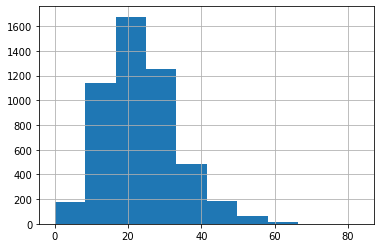

In [ ]:
# HW4T1a
# Task 1: Produce histograms for each the three metric outcome variables
#
sentDB["polys"].hist()
#Looks like normal distribution with a skew to the right

<Axes: >

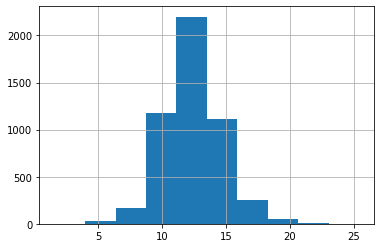

In [ ]:
sentDB["cl"].hist()

#Normally distributed

<Axes: >

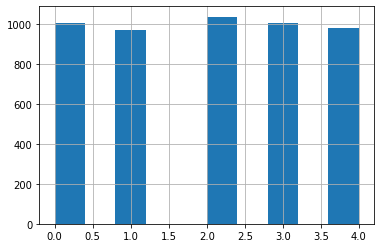

In [ ]:
sentDB["incoh"].hist()

#Frequency at certain values

In [ ]:
# How big does our padded (square) input matrix need to be?
max_mat_size = max([len(sent.split(";")) for sent in sentDB["text"]])
max_mat_size

#19 is the maximum number of sentences in a paragraph

19

**Task 2**

Show a few of the texts from the dataset. Note the semicolons that separate the sentences. Each row of the dataset has a set of sentences – the number of sentences varies per row.

In [ ]:
# HW4T2a
# Task 2: Examine a few of the texts.
#
sentDB["text"][0]
#0th row contains a paragraph of 5 sentences

"He was elected County Executive of Anne Arundel County , Maryland from 1990 to 1994 .; Neall was a member of the Budget and Taxation Committee .; After his term ended , Neall was appointed by the Anne Arundel County Republican Central Committee to fill a vacancy as state senator from the 33rd District after the death of John A. Cade .; In a letter to Richard D. Bennett , the state GOP chairman and now U.S. District Court Judge , Neall said , `` While I have from time to time felt uncomfortable and unwelcome in the Republican Party , ( my ) feelings have clearly worsened in recent years '' because of the changing nature of the party .; In 1999 , although the 33rd legislative District is one of Maryland 's most conservative with 6,700 more registered Republicans than Democrats , Neall switched parties on ideological grounds and became a Democrat .; Neall was also a member of the Thornton Commission , which developed a plan for distributing money to the state 's needier school districts 

In [ ]:
sentDB["text"][10]
#10th row contains a paragraph of 5 sentences

"As a teenager , Reece 's family moved again from The Big Island to Oahu where he met Conrad Keely through a mutual friend , and they later both moved to Olympia , WA where Keely attended college .; Reece then joined the band Honeybucket and , when that band broke up , Mukilteo Fairies .; There they formed a band from which Reece was shortly fired .; Keely joined him in moving , and they formed ... And You Will Know Us by the Trail of Dead , initially as a guitar-and-drums duo .; In 1994 Reece relocated to Austin .; Later other members joined , and in 2001 , after two albums released on independent labels , the band was signed by Interscope ."

In [ ]:
sentDB["text"][3500]
#3500th row contains a paragraph of 5 sentences

"A decade of labor-intensive oligonucleotide cataloging left him with a reputation as `` a crank , '' and Woese would go on to be dubbed as `` Microbiology 's Scarred Revolutionary '' by a news article printed in the journal `` Science '' .; Today , few scientists cling to the idea of a unified Prokarya .; The growing amount of supporting data led the scientific community to accept the Archaea by the mid-1980s .; Woese 's work on Archaea is also significant in its implications for the search for life on other planets .; Before the discovery by Woese and Fox , scientists thought that Archaea were extreme organisms that evolved from the organisms more familiar to us .; Now , most believe they are ancient , and may have robust evolutionary connections to the first organisms on Earth ."

In [ ]:
# We will need the library for loading sentence transformers
# This generates a lot of output, but should run pretty fast.
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=7acc1d38021efb4140fcc2092630238df32ac02f4ee34a2b524345d96aafe525
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In this next step you have the opportunity to select one of three sentence vectorizers. These vary in terms of their dimensionality. The cosine similarities that you generate to measure the similarity of sentences will be affected by which model you choose.

In [ ]:
#@title Task 3: Choose a Pretrained Sentence Summarizer

model_name = 'Six Level Mini-LM V2 (d=384)'  #@param ["Six Level Mini-LM V2 (d=384)", "Multilingual Sentence BERT (d=512)", "Multi-QA MPnet (d=768)"]

map_name_to_handle = {
    'Six Level Mini-LM V2 (d=384)':
        'sentence-transformers/all-MiniLM-L6-v2',
    'Multilingual Sentence BERT (d=512)':
        'sentence-transformers/distiluse-base-multilingual-cased-v2',
    'Multi-QA MPnet (d=768)':
        'sentence-transformers/multi-qa-mpnet-base-dot-v1'
    
}


my_transformer = map_name_to_handle[model_name]

print(f'Sentence model selected           : {my_transformer}')


Sentence model selected           : sentence-transformers/all-MiniLM-L6-v2


In [ ]:
# Now load the pre-trained sentence transformer, based on your selection above.
# This downloads a lot of data to your virtual machine and takes half a minute or so.
from sentence_transformers import SentenceTransformer

#Chosen the Six Level Mini-LM V2(d=384)
model = SentenceTransformer(my_transformer)

In [ ]:
# This defines a function that takes an input matrix and puts it in the
# upper left corner of a padded, standard-sized matrix

import numpy as np

def pad_matrix(in_mat, mat_size):

  ret_mat = np.zeros(shape=(mat_size, mat_size))

  # By using Python indices, we can target the upper left subset
  # of the return matrix in the same shape as the input matrix.
  ret_mat[0:in_mat.shape[0] , 0:in_mat.shape[1] ] = in_mat
  
  return(ret_mat)

In [ ]:
# Test the padder
M = np.arange(3*3).reshape((3,3))
print(M)

pad_matrix(M, 5)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[0., 1., 2., 0., 0.],
       [3., 4., 5., 0., 0.],
       [6., 7., 8., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
# HWT3a
# Exercise: Test the padder using a 4x4 input matrix that needs to be padded to 6x6
#
#4*4 matrix 
test_pad = np.arange(4*4).reshape((4,4))
print(test_pad)

#reshaped to 6*6 matrix
pad_matrix(test_pad, 6)
#We see the padding after the 4*4 matrix is filled

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[ 0.,  1.,  2.,  3.,  0.,  0.],
       [ 4.,  5.,  6.,  7.,  0.,  0.],
       [ 8.,  9., 10., 11.,  0.,  0.],
       [12., 13., 14., 15.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
# Process the individual texts: Computational time depends on the sentence summarizer selected,
# but could take 15-20 minutes for nearly 5000 instances.
from sentence_transformers.util import cos_sim

mat_list = []

for text in sentDB["text"]:
  items = text.split(";")
  vect_list = model.encode(items)
  sim_matrix = cos_sim(vect_list, vect_list)
  mat_list.append(pad_matrix(sim_matrix, max_mat_size))

In [ ]:
# Should have the same number of matrices as rows in the pandas df
len(mat_list)

4998

In [ ]:
# HW4T3b
# (End of) Task 3: Review one of the padded matrices. Comment on what you see.
#
mat_list[0]

#Here we have the padded similarity matrix
#Since the paragraph with maximum number of sentences is 19,
#we see that there is nested list of 19 arrays with 19 elements in it. (Square matrix)
#As expected the input matrix is put in the upper left corner of the similarity matrix
#We see that each list has 19 elements which is the cosine similarity between the sentences
#As expected we see 1's in the diagonals of the square matrix. 
#After the number of the sentences are covered, the remaining is left as 0
#Cosine similarity of 0 means there is no relationship among the sentences
#Cosine similarity closer to 1,means there is more similarity in meaning between the sentences

array([[1.00000012, 0.2473855 , 0.38485527, 0.14406662, 0.41621459,
        0.34496796, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.2473855 , 1.        , 0.63896048, 0.24556825, 0.43078703,
        0.61997831, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.38485527, 0.63896048, 1.        , 0.2564531 , 0.49119863,
        0.57606649, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.14406662, 0.24556825, 0.2564531 , 1.00000012, 0.34540027,
        0.07859185, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.   

**Task 4**

Set up a CNN model to process the similarity matrices. The goal is to train models that can predict each of the three measures of quality using the similarity matrices as input. Use the same architecture for all three models. Don't forget that all three of these outcome variables are interval/metric data. You should therefore make the final layer of the model a single linear activation node. This is not the only possible option, but it is the most sensible one. Make sure to show a model summary that shows the layers and the shapes of data flowing between the layers.

In [ ]:
# First set up testing and training splits that will be used by each of the three models
from sklearn.model_selection import train_test_split
import tensorflow as tf


# Do random splits for testing and training
PX_train, PX_test, Py_train, Py_test = train_test_split(mat_list, sentDB["polys"], test_size=0.33, random_state=42)
CX_train, CX_test, Cy_train, Cy_test = train_test_split(mat_list, sentDB["cl"], test_size=0.33, random_state=42)
IX_train, IX_test, Iy_train, Iy_test = train_test_split(mat_list, sentDB["incoh"], test_size=0.33, random_state=42)

#Lets further split train data into train and validation
#Then we can get validation loss during training

PX_train, PX_val, Py_train, Py_val = train_test_split(PX_train, Py_train, test_size=0.2, random_state=42)
CX_train, CX_val, Cy_train, Cy_val = train_test_split(CX_train, Cy_train, test_size=0.2, random_state=42)
IX_train, IX_val, Iy_train, Iy_val = train_test_split(IX_train, Iy_train, test_size=0.2, random_state=42)

# Convert to tensors for presenting to TF - #Include validation set also
PX_train_tensor = tf.convert_to_tensor(PX_train)
PX_test_tensor = tf.convert_to_tensor(PX_test)
Py_train_tensor = tf.convert_to_tensor(Py_train)
Py_test_tensor = tf.convert_to_tensor(Py_test)
PX_val_tensor =tf.convert_to_tensor(PX_val)
Py_val_tensor =tf.convert_to_tensor(Py_val)

CX_train_tensor = tf.convert_to_tensor(CX_train)
CX_test_tensor = tf.convert_to_tensor(CX_test)
Cy_train_tensor = tf.convert_to_tensor(Cy_train)
Cy_test_tensor = tf.convert_to_tensor(Cy_test)
CX_val_tensor =tf.convert_to_tensor(CX_val)
Cy_val_tensor =tf.convert_to_tensor(Cy_val)

IX_train_tensor = tf.convert_to_tensor(IX_train)
IX_test_tensor = tf.convert_to_tensor(IX_test)
Iy_train_tensor = tf.convert_to_tensor(Iy_train)
Iy_test_tensor = tf.convert_to_tensor(Iy_test)
IX_val_tensor =tf.convert_to_tensor(IX_val)
Iy_val_tensor =tf.convert_to_tensor(Iy_val)



In [ ]:
# Here are a few keras imports that will probably be needed. You can include
# other kinds of layers appropriate to CNNs if you like. 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

from keras.losses import MeanSquaredError

# Hint: after running modelC = Sequential(), you can add each new layer using
# modelC.add()






At this point in the code, create three separate CNN models using Sequential(). Look to the Week 8 lecture and Lab 8 for information on configuring CNN models. The most basic model could consist of a 2D convolutional layer (because your input is a set of 2D matrices) followed by a max-pooling-2D layer, followed by a flattening layer, and concluding with a single unit dense layer with linear activation (because you are predicting a metric output rather than a categorical one). You should try more complex models as well. Note that your error function should be Mean Squared Error.

Hint: Get the first model working first (the one where you will predict Py_train_tensor during training) making adjustments to the layers and hyperparameters as needed to improve the training. Once that first model is working well, you can simply copy it and change the training inputs and outputs 

In [ ]:
# These are some hyperparameters that you may be helpful in specifying the layers

#Changed the num_filters to 2 and kern_size to 2,2

input_shape = (max_mat_size, max_mat_size, 1) # Each input is a single layer square matrix 
num_filters = 2 # You can adjust this up or down to try to improve model fit
kern_size = (2, 2) # You can adjust this up or down as needed to improve model fit
max_pooling_size = (2, 2) # Making a pooling window larger than 2,2 can result in a loss of important data
dense_size = 64 # How many neurons to receive the output of the max pooling layer
dense_act = 'linear'
val_split = 0.2

In [ ]:
#CREATING CNN MODEL:
modelC=Sequential()
#First CNN layer
modelC.add(Conv2D(filters=num_filters, 
                        kernel_size=kern_size,
                        strides=1,
                        padding='valid',
                        activation='relu',
                        input_shape=input_shape))
#First maxpool layer
modelC.add(MaxPooling2D((max_pooling_size)))
#Second CNN layer
modelC.add(Conv2D(filters=num_filters, 
                        kernel_size=kern_size,
                        strides=1,
                        padding='valid',
                        activation='relu'))
#Second maxpool layer
modelC.add(MaxPooling2D((max_pooling_size)))
#Third CNN layer
modelC.add(Conv2D(filters=num_filters, 
                        kernel_size=kern_size,
                        strides=1,
                        padding='valid',
                        activation='relu'
                        ))
#Third maxpool layer
modelC.add(MaxPooling2D((max_pooling_size)))
#Flatten layer
modelC.add(Flatten())
#Dense layer
modelC.add(Dense(dense_size,activation=dense_act))
#Final one dense layer
modelC.add(Dense(1,activation=dense_act))

Remember, because you are predicting metric outcomes (i.e., floating point numbers) rather than categories, you should use MeanSquaredError() as your loss function. Make sure to show a model summary that confirms the shapes of the various layers.  

During training, carefully monitor the number of epochs needed to fully train the model without overtraining it. Keep your eye on the validation loss to make sure it does not start to climb far higher than the training loss.

Once you have a trained model that is satisfactory for each of your outcome variables, make predictions using the model and the original input data and compute a regular correlation coefficient (e.g., with numpy corrcoef) to confirm how well the model performs.

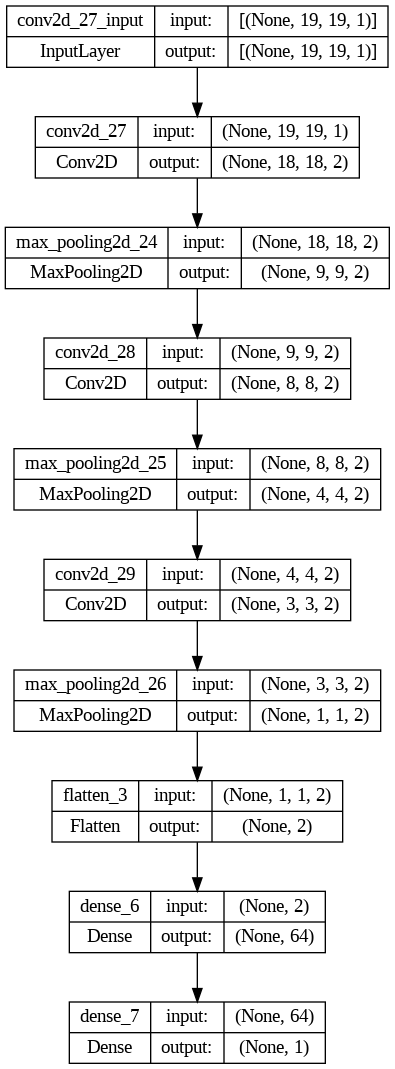

In [ ]:
#
# (End of) Task 4: Compile and summarize your models here.
# Hint: Adam would be a reasonable optimizer to use: optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005)
# You can also experiment with a faster learning rate.
#
modelC.compile('adam', loss='mean_squared_error', metrics=['mse'])

#Show the layers of CNN and how they are connected
from IPython.display import Image
from keras.utils.vis_utils import plot_model
plot_model(modelC, show_shapes=True, show_layer_names=True)
Image('model.png')



In [ ]:
#Summary of model
modelC.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 18, 18, 2)         10        
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 9, 9, 2)          0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 8, 2)           18        
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 4, 4, 2)          0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 2)           18        
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 1, 1, 2)         

**Task 5**

Train your CNN models. Experiment with the learning rate and the number of epochs to make your training as efficient as you can. Remember, get the first model working satisfactorily first, before you make copies for predicting the other two outcome variables.

In [ ]:
# HW4T5a
#POLYS
# Train your models here

#Setting learning rate
learning_rate=0.05

modelC.fit(PX_train_tensor, Py_train_tensor, epochs=20, batch_size=32, validation_data=(PX_val_tensor, Py_val_tensor))

#Iterations tested:
#learning_rate=0.05, epochs =10, batch_size=32 - loss at 98.6 - val - 97.2
#20 more epochs on top of previous iteration - loss at 96.9 - val -95.9 - not big difference
#learning_rate=0.0001, epochs =20, batch_size=32 - loss/mse at 98.2 - val - 98.8
#learning_rate=0.0005, epochs =30, batch_size=32 - loss/mse at 95.8 - val - 97.9
#learning_rate=0.01, epochs =20, batch_size=32 - loss/mse at 95.99 - val - 95.0
#learning_rate=0.05, epochs =50, batch_size=32 - loss/mse at 97.2 - val - 98.0 
#FINAL CHOSEN: learning_rate=0.05, epochs =20, batch_size=32 - loss/mse at 96.8 - val - 96.9
#After 20 epochs, we dont see a big difference in decrease in loss/mse, we see a slight increase in validation loss
#After 20 epochs with learning rate of 0.05, the model is typically overfitting

Epoch 1/20
84/84 [==============================] - 2s 9ms/step - loss: 601.0791 - mse: 601.0791 - val_loss: 523.2484 - val_mse: 523.2484
Epoch 2/20
84/84 [==============================] - 1s 7ms/step - loss: 266.0172 - mse: 266.0172 - val_loss: 100.6094 - val_mse: 100.6094
Epoch 3/20
84/84 [==============================] - 1s 7ms/step - loss: 100.1401 - mse: 100.1401 - val_loss: 99.9438 - val_mse: 99.9438
Epoch 4/20
84/84 [==============================] - 1s 7ms/step - loss: 100.2302 - mse: 100.2302 - val_loss: 99.5949 - val_mse: 99.5949
Epoch 5/20
84/84 [==============================] - 1s 8ms/step - loss: 99.9145 - mse: 99.9145 - val_loss: 99.4501 - val_mse: 99.4501
Epoch 6/20
84/84 [==============================] - 1s 7ms/step - loss: 99.8019 - mse: 99.8019 - val_loss: 99.4995 - val_mse: 99.4995
Epoch 7/20
84/84 [==============================] - 1s 7ms/step - loss: 99.7395 - mse: 99.7395 - val_loss: 99.4551 - val_mse: 99.4551
Epoch 8/20
84/84 [==============================] 

In [ ]:
#CL
#Setting learning rate
learning_rate=0.05

modelC.fit(CX_train_tensor, Cy_train_tensor, epochs=20, batch_size=32, validation_data=(CX_val_tensor, Cy_val_tensor))

#learning_rate=0.05, epochs =20, batch_size=32 - loss/mse at 5.1 - val - 5.6

Epoch 1/20
84/84 [==============================] - 3s 16ms/step - loss: 16.5411 - mse: 16.5411 - val_loss: 6.1512 - val_mse: 6.1512
Epoch 2/20
84/84 [==============================] - 1s 8ms/step - loss: 5.6005 - mse: 5.6005 - val_loss: 6.0911 - val_mse: 6.0911
Epoch 3/20
84/84 [==============================] - 1s 9ms/step - loss: 5.5578 - mse: 5.5578 - val_loss: 6.0321 - val_mse: 6.0321
Epoch 4/20
84/84 [==============================] - 1s 12ms/step - loss: 5.5139 - mse: 5.5139 - val_loss: 5.9877 - val_mse: 5.9877
Epoch 5/20
84/84 [==============================] - 1s 12ms/step - loss: 5.4770 - mse: 5.4770 - val_loss: 5.9492 - val_mse: 5.9492
Epoch 6/20
84/84 [==============================] - 1s 8ms/step - loss: 5.4456 - mse: 5.4456 - val_loss: 5.9087 - val_mse: 5.9087
Epoch 7/20
84/84 [==============================] - 1s 9ms/step - loss: 5.4173 - mse: 5.4173 - val_loss: 5.8910 - val_mse: 5.8910
Epoch 8/20
84/84 [==============================] - 1s 8ms/step - loss: 5.3756 - mse:

In [ ]:
#INCOH
#Setting learning rate
learning_rate=0.05

modelC.fit(IX_train_tensor, Iy_train_tensor, epochs=20, batch_size=32, validation_data=(IX_val_tensor, Iy_val_tensor))

#learning_rate=0.05, epochs =20, batch_size=32 - loss/mse at 1.98 - val - 1.99

Epoch 1/20
84/84 [==============================] - 2s 21ms/step - loss: 13.3587 - mse: 13.3587 - val_loss: 2.0203 - val_mse: 2.0203
Epoch 2/20
84/84 [==============================] - 1s 8ms/step - loss: 1.9870 - mse: 1.9870 - val_loss: 1.9947 - val_mse: 1.9947
Epoch 3/20
84/84 [==============================] - 1s 8ms/step - loss: 1.9838 - mse: 1.9838 - val_loss: 1.9936 - val_mse: 1.9936
Epoch 4/20
84/84 [==============================] - 1s 8ms/step - loss: 1.9838 - mse: 1.9838 - val_loss: 1.9970 - val_mse: 1.9970
Epoch 5/20
84/84 [==============================] - 1s 8ms/step - loss: 1.9837 - mse: 1.9837 - val_loss: 1.9959 - val_mse: 1.9959
Epoch 6/20
84/84 [==============================] - 1s 8ms/step - loss: 1.9836 - mse: 1.9836 - val_loss: 1.9920 - val_mse: 1.9920
Epoch 7/20
84/84 [==============================] - 1s 13ms/step - loss: 1.9849 - mse: 1.9849 - val_loss: 1.9968 - val_mse: 1.9968
Epoch 8/20
84/84 [==============================] - 1s 10ms/step - loss: 1.9835 - mse:

**Task 6**

Once each model is fully trained to your satisfaction, use the "predict" method on your test set to compute a set of predicted values from the set of input matrices. Use a Pearson's correlation (r) between predicted and actual values (from the test set) as a final model performance metric. You can use np.corrcoef() to calculate this. You may need to append .squeeze(axis=-1) to the predict function to get the predictions into the shape they need to be in for np.corrcoef().

Report the value of Pearson's r for each of the three models.

In [ ]:
# HW4T6a
# Task 6: Evaluate your models here
#
Ptest_loss, Ptest_mse = modelC.evaluate(PX_test_tensor, Py_test_tensor)
Ctest_loss, Ctest_mse = modelC.evaluate(CX_test_tensor, Cy_test_tensor)
Itest_loss, Itest_mse = modelC.evaluate(IX_test_tensor, Iy_test_tensor)

#P
Py_pred = modelC.predict(PX_test_tensor).squeeze(axis=-1)
pr = np.corrcoef(Py_pred, Py_test_tensor)[0, 1]
print('PTest loss:', Ptest_loss)
print('PTest MAE:', Ptest_mse)
print('Pearson correlation coefficient P(r):', pr)
#C
Cy_pred = modelC.predict(CX_test_tensor).squeeze(axis=-1)
cr = np.corrcoef(Cy_pred, Cy_test_tensor)[0, 1]
print('CTest loss:', Ctest_loss)
print('CTest MAE:', Ctest_mse)
print('Pearson correlation coefficient C(r):', cr)
#I
Iy_pred = modelC.predict(IX_test_tensor).squeeze(axis=-1)
ir = np.corrcoef(Iy_pred, Iy_test_tensor)[0, 1]
print('ITest loss:', Itest_loss)
print('ITest MAE:', Itest_mse)
print('Pearson correlation coefficient I(r):', ir)

52/52 [==============================] - 0s 3ms/step
PTest loss: 551.901611328125
PTest MAE: 551.901611328125
Pearson correlation coefficient P(r): 0.19710576195311705
52/52 [==============================] - 0s 6ms/step
CTest loss: 112.9009780883789
CTest MAE: 112.9009780883789
Pearson correlation coefficient C(r): 0.12252885090275335
52/52 [==============================] - 0s 6ms/step
ITest loss: 1.9593216180801392
ITest MAE: 1.9593216180801392
Pearson correlation coefficient I(r): 0.031074534671508468


**Task 7** 


The very last block in the notebook should be a text block that documents and discusses your results. Make sure your discussion describes performance you achieved on each of the three different metrics. Give some thought to why the performance levels of the three models may differ from each other. Based on your results, what can be learned from vectorizing a series of sentences? Comment on whether you think that your models are overtrained – that is would these models generalize to new sentences extracted from Wikipedia?

HWCC <br>

In this homework, We have the continuous values of polysyllabic, Coleman-Liau index and sentence order incoherencies available to us. We are trying to predict the coherence of a paragraph from the sentence cosine similarities.<br>

<b>Results:</b><br>
Trying to find best fit for Polys CNN model:<br>
I tried different iterations of filter size, kernel size along with different learning rates and epochs.<br>

With num_filters as 2, and kernel size as 2 by 2, different iterations of learning rate and epochs were tried. Mostly, around 20 epochs for different learning rates, the model reaches the lowest MSE. After that, we see a slight increase in validation loss, indicating that the model is overfitting.<br>

With num_filters as 5, and kernel size as 2 by 2, we don’t see much difference from the above results. With num_filters as 5 and kernel size as 1 by 1, we see that the model is underfitting and takes more epochs to reduce the loss. 
<br>
num_filters as 2, and kernel size as 2 by 2, learning rate as 0.05, epochs = 20:<br>
Values of polysyllabic ranges from 0 to 80, then MSE of 96 is high<br>
Values of Coleman-Liau ranges from 0 to 25, then MSE of 5.15<br>
Values of incoherence is between 0 to 4, then MSE of 1.983<br><br>

<b>Model performance after predicting and finding correlation:</b><br>
Pearson correlation for Polys – 0.19<br>
Pearson correlation for CL – 0.122<br>
Pearson correlation for Incoh – 0.03<br>
The Pearson correlation for all three attributes are pretty low, indicating that these are not good predictors.<br>

<b>Why the model performance differs from each other:</b><br>
As we saw from the histograms above, the nature and range of data are different. These are very different measures of coherence in a paragraph. The same hyperparameters of filter size, kernel size, learning rate might not work well for all the dependent variables we are trying to predict. Creating a separate training model for each might work better on the variables we are trying to predict. <br>

<b>What can we learn when we vectorize a series of sentences:</b><br>
Using a 2D convolutional filter over a series of sentences, we can capture the features within sentences. However, finding cosine similarity between the sentences is not good enough to predict other tasks. <br>

<b>Are they overtrained? Is models generalizable to new sentences?</b><br>
The CNN model is not overtrained. It seems to, in fact, underfit, and not predict so well with Polys. With the other two attributes, we get a decent Mean Squared Error, indicating a good fit. The model can generalize well for CL and Incoh attributes. It cannot handle new sentences to predict Polys. <br>